In [4]:
import numpy as np
import matplotlib.pyplot as plt

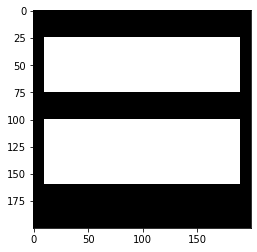

In [10]:
img = np.zeros((200,200),np.uint8)
img[25:75,10:190] = 255
img[100:160,10:190] = 255
plt.imshow(img,'gray')